## Overview

Though simply games at their core, sports have served humanity since their conception as a tool of entertainment, inspirationl, and culture. This report takes a look at one of those sports in particular - American Football - and how it may (or may not) relate to the reported happiness of the people that surround it. This project will be exploring the effect sports teams' performances have on the overall happiness of the city and its citizenry of which the teams belong to. Does the happiness of a city/area correlate to the general success of the sports teams within it? While many factors can contribute to a city's overall happiness, it can be hypothesized that the more successful a sports team is, the more happy a city would be through a cultural lens. 

## Motivation

I've always enjoyed watching sports and observing sports culture in cities all across America and the world at large. Being able to find correlations between sports performance and mental wellbeing would not only be a good application of the data skills I've been developing here in HCDE 410 but would also be very interesting to me and something not only I would enjoy exploring, but others would enjoy seeing as well. I hope to learn about overall sports performance in cities around the US, overall happiness levels, and new things about teams and cities I'm not too familiar with. And while many cities all over the US house a plethora of sports teams, for brevity's sake, the sport that takes a focus here is football. 

## Research Question

How does the performance of NFL teams, measured by win percentages, relate to community health metrics such as the average number of mentally unhealthy days and excessive drinking rates in corresponding regions?

## Hypothesis

While the nature of the study doesn't promise concrete findings, it can be hypothesized that *variations in team success may influence localized patterns in these health behaviors over time, particularly in regions with strong fan engagement*. 

## Data

The data sets I will be using are the data sets containing team data for the NBA, NFL, and MLB respectively as well as the County Health Database using data from 2012 to 2022.  

* NFL Data Set: https://www.kaggle.com/datasets/nickcantalupa/nfl-team-data-2003-2023
* County Health Data: https://www.countyhealthrankings.org/health-data/methodology-and-sources/data-documentation/national-data-documentation-2010-2022

I'm focusing on NFL team data as this would allow me to cross-reference the stadium locations of the teams with corresponding counties in the mental health data report. Since the data is largely public focusing on a sports franchise, privacy is not a major concern in that regard.  

## Background

Much of the research done on the effect sports teams have on the cities they occupy is done through a more economic lens. This allows for many data points to be quantified a lot easier as economic fluctuations are metrics that are a lot easier to measure than a broad concept like how a performance would affect one's mood. Research conducted at Coastal Carolina University highlights the various economic benefits a sports team introduces, and while economic success isn't the single pillar of happiness, the overall economic wellbeing of a city can definitely contribute to its happiness and the happiness of its people in a positive way. This research has lead me to think about other ways sports team allow cities to prosper and whether or not this prosperity should be taken into account in the research as another point of observation and analysis. Finding economic data that connects to each of the sports team could corroborate many of the findings attained from looking at the county health data. 

## Methodology

### Cleaning the Data
Prepping the data for analysis itself took some care to do. The first step was extracting only what we needed to reduce the amount of noise both me and the computer would have to deal with once we do start unpacking things. The NFL stats were already very clean and easy to access. The county data saw some formatting changes over time, and this is important as each year hosted its own set of data. This meant that each year had to be transposed into a format that would be readable regardless of the format of the original data for that year. This involved creating new data, copying the data over onto that new table with each county and making sure all headers were the same to ensure mergability in the future. Next, there was creating a custom table. This custom table connected the NFL team data with the county health data through the names of the team and the county they play in when they play at home (i.e. the location of their respective stadiums). Some teams saw location changes - like the Oakland Raiders to Las Vegas - and others play in stadiums that may not be directly located within the hub of their fanbases are as well - like the New York Jets and New York Giants playing in New Jersey. With this in mind though, the stadium rule was maintained as uniformity needed to be kept to reduce as much variability and exception as possible.  

### Working with the Data

1. Investigating the Phenomenon

* Defining Key Variables:
  * Independent Variable: Team performance metrics (win/loss percentage).
  * Dependent Variable: Reported mental wellbeing (observing poor mental health days).
* Data Preprocessing: Clean and align data across sports datasets and the county health data by corresponding city/county and time period. Check for missing data, especially in recent years, and consider methods like interpolation or exclusion if necessary. Merge the tables as needed. 
  
2. Analytical Methods
* Correlation Analysis: Perform Pearson correlation tests to assess relationships between team performance metrics and poor mental health days (theoretically should be inverse).
* Consider Time-Series Analysis (e.g., ARIMA models) if you have yearly performance data, to explore trends over time.

3. Presentation of Findings
* Data Visualizations:
  * Correlation Heatmaps: Show relationships among team performance metrics, mental health, and anything else notable.
  * Time Series Graphs: Display trends in mental health scores alongside team performance over time.
* Tables:
  * Present regression model outputs, including coefficients and p-values, to highlight significant relationships.
* Summarize key statistical tests results to make comparisons between cities more digestible.
  
4. Justification for Methods
* Correlation and Regression: These allow you to quantify and control for confounding variables, strengthening your ability to argue that any observed relationship between team success and happiness is meaningful.
* Visualization Choices: The barchart combined with a time series line chart effectively displays the two variables we are trying to relate and gives us the opportunity to see if there's anything overtly obvious to note. 

## Unknowns
The largest unknown is seeing what other hidden variables can impact happiness that may affect the outcome of the findings. Additionally, there are more recent years missing in many of the data sets so the information may not be as pertinent. 

## The Code

In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

def add_time_data(start_year=2012, end_year=2022, data_directory='./'):
    """
    Automates the process of adding time series data from years 2012 to 2022 into a single DataFrame.

    Parameters:
    start_year (int): The start year of the time series data (default is 2012).
    end_year (int): The end year of the time series data (default is 2022).
    data_directory (str): The directory where the yearly CSV files are stored (default is the current directory).

    Returns:
    pd.DataFrame: A DataFrame containing the combined time series data.
    """
    # Initialize an empty list to hold the DataFrames
    data_frames = []

    # Loop through the range of years
    for year in range(start_year, end_year + 1):
        # Construct the file name
        file_name = f'data/{data_directory}/{data_directory}_{year}.csv'

        try:
            # Read the CSV file for the current year
            df = pd.read_csv(file_name)
            
            # Add a 'year' column to track the year of the data
            df['year'] = year

            # Append the DataFrame to the list
            data_frames.append(df)
        except FileNotFoundError:
            print(f"File for year {year} not found. Skipping this year.")

    # Concatenate all DataFrames into one DataFrame
    combined_df = pd.concat(data_frames, ignore_index=True)

    return combined_df

In [1]:
# Filter the data for the years and columns we want
mental_health_series = add_time_data(2012, 2022, 'mental_health')
mental_health_series = mental_health_series[['County', 'Average Number of Mentally Unhealthy Days', 'year']]
mental_health_series

NameError: name 'add_time_data' is not defined

In [5]:
# Repeat filtration for drinking series
excessive_drinking_series = add_time_data(2012, 2022, 'excessive_drinking')
excessive_drinking_series = excessive_drinking_series[['County', '% Excessive Drinking', 'year']]
excessive_drinking_series

,County,% Excessive Drinking,year
0,Autauga,16.0,2012
1,Baldwin,20.0,2012
2,Barbour,11.0,2012
3,Bibb,13.0,2012
4,Blount,5.0,2012
...,...,...,...
35118,Sweetwater,18.0,2022
35119,Teton,19.0,2022
35120,Uinta,18.0,2022
35121,Washakie,19.0,2022


In [6]:
# Final filtration for the NFL stats
nfl_stats_full = pd.read_csv('data/nfl_team_stats_2003_2023.csv')
nfl_stats = nfl_stats_full[(nfl_stats_full['year'] >= 2012) & (nfl_stats_full['year'] <= 2022)] 
nfl_stats = nfl_stats[['team', 'win_loss_perc', 'year']]
nfl_stats

,team,win_loss_perc,year
288,New England Patriots,0.750,2012
289,Miami Dolphins,0.438,2012
290,New York Jets,0.375,2012
291,Buffalo Bills,0.375,2012
292,Baltimore Ravens,0.625,2012
...,...,...,...
635,Atlanta Falcons,0.412,2022
636,San Francisco 49ers,0.765,2022
637,Seattle Seahawks,0.529,2022
638,Los Angeles Rams,0.294,2022


In [7]:
# Load our custom team-county data table
nfl_teams = pd.read_csv('data/teams_with_counties/nfl_teams_and_county.csv')
nfl_teams

,FIPS,State,County,Football Team,Unnamed: 4,Unnamed: 5
0,4013,Arizona,Maricopa,Arizona Cardinals,NaN,NaN
1,13121,Georgia,Fulton,Atlanta Falcons,NaN,NaN
2,24005,Maryland,Baltimore,Baltimore Ravens,NaN,NaN
3,36029,New York,Erie,Buffalo Bills,NaN,NaN
4,37119,North Carolina,Mecklenburg,Carolina Panthers,NaN,NaN
5,17031,Illinois,Cook,Chicago Bears,NaN,NaN
6,39061,Ohio,Hamilton,Cincinnati Bengals,NaN,NaN
7,39035,Ohio,Cuyahoga,Cleveland Browns,NaN,NaN
8,48113,Texas,Dallas,Dallas Cowboys,NaN,NaN
9,8031,Colorado,Denver,Denver Broncos,NaN,NaN


In [35]:
# Use 'left_on' and 'right_on' to specify columns
merged1 = pd.merge(nfl_teams, nfl_stats, left_on='Football Team', right_on='team', how='inner')
merged2 = pd.merge(nfl_teams, mental_health_series, left_on='County', right_on='County', how='inner')

print(merged1)
print(merged2)

      FIPS     State           County        Football Team  Unnamed: 4  \
0     4013   Arizona         Maricopa    Arizona Cardinals         NaN   
1     4013   Arizona         Maricopa    Arizona Cardinals         NaN   
2     4013   Arizona         Maricopa    Arizona Cardinals         NaN   
3     4013   Arizona         Maricopa    Arizona Cardinals         NaN   
4     4013   Arizona         Maricopa    Arizona Cardinals         NaN   
..     ...       ...              ...                  ...         ...   
325  24033  Maryland  Prince George's  Washington Redskins         NaN   
326  24033  Maryland  Prince George's  Washington Redskins         NaN   
327  24033  Maryland  Prince George's  Washington Redskins         NaN   
328  24033  Maryland  Prince George's  Washington Redskins         NaN   
329  24033  Maryland  Prince George's  Washington Redskins         NaN   

     Unnamed: 5                 team  win_loss_perc  year  
0           NaN    Arizona Cardinals          0.313

In [87]:
# Rename columns if necessary for consistency
merged2.rename(columns={'Football Team': 'team'}, inplace=True)

# Merge the two tables
final_merged1 = pd.merge(
    merged1, merged2, 
    on=['team', 'year'],  # Columns to merge on
    how='left'           # Merge type: 'inner', 'outer', 'left', or 'right'
)

# Display the resulting DataFrame

final_merged1 = final_merged1.drop(['Unnamed: 4_x', 'Unnamed: 5_x', 'FIPS_y', 'State_y', 'County_y', 'Unnamed: 4_y', 'Unnamed: 5_y'], axis=1)

print(final_merged1)

      FIPS_x   State_x         County_x        Football Team  \
0       4013   Arizona         Maricopa    Arizona Cardinals   
1       4013   Arizona         Maricopa    Arizona Cardinals   
2       4013   Arizona         Maricopa    Arizona Cardinals   
3       4013   Arizona         Maricopa    Arizona Cardinals   
4       4013   Arizona         Maricopa    Arizona Cardinals   
...      ...       ...              ...                  ...   
1363   24033  Maryland  Prince George's  Washington Redskins   
1364   24033  Maryland  Prince George's  Washington Redskins   
1365   24033  Maryland  Prince George's  Washington Redskins   
1366   24033  Maryland  Prince George's  Washington Redskins   
1367   24033  Maryland  Prince George's  Washington Redskins   

                     team  win_loss_perc  year  \
0       Arizona Cardinals          0.313  2012   
1       Arizona Cardinals          0.625  2013   
2       Arizona Cardinals          0.688  2014   
3       Arizona Cardinals      

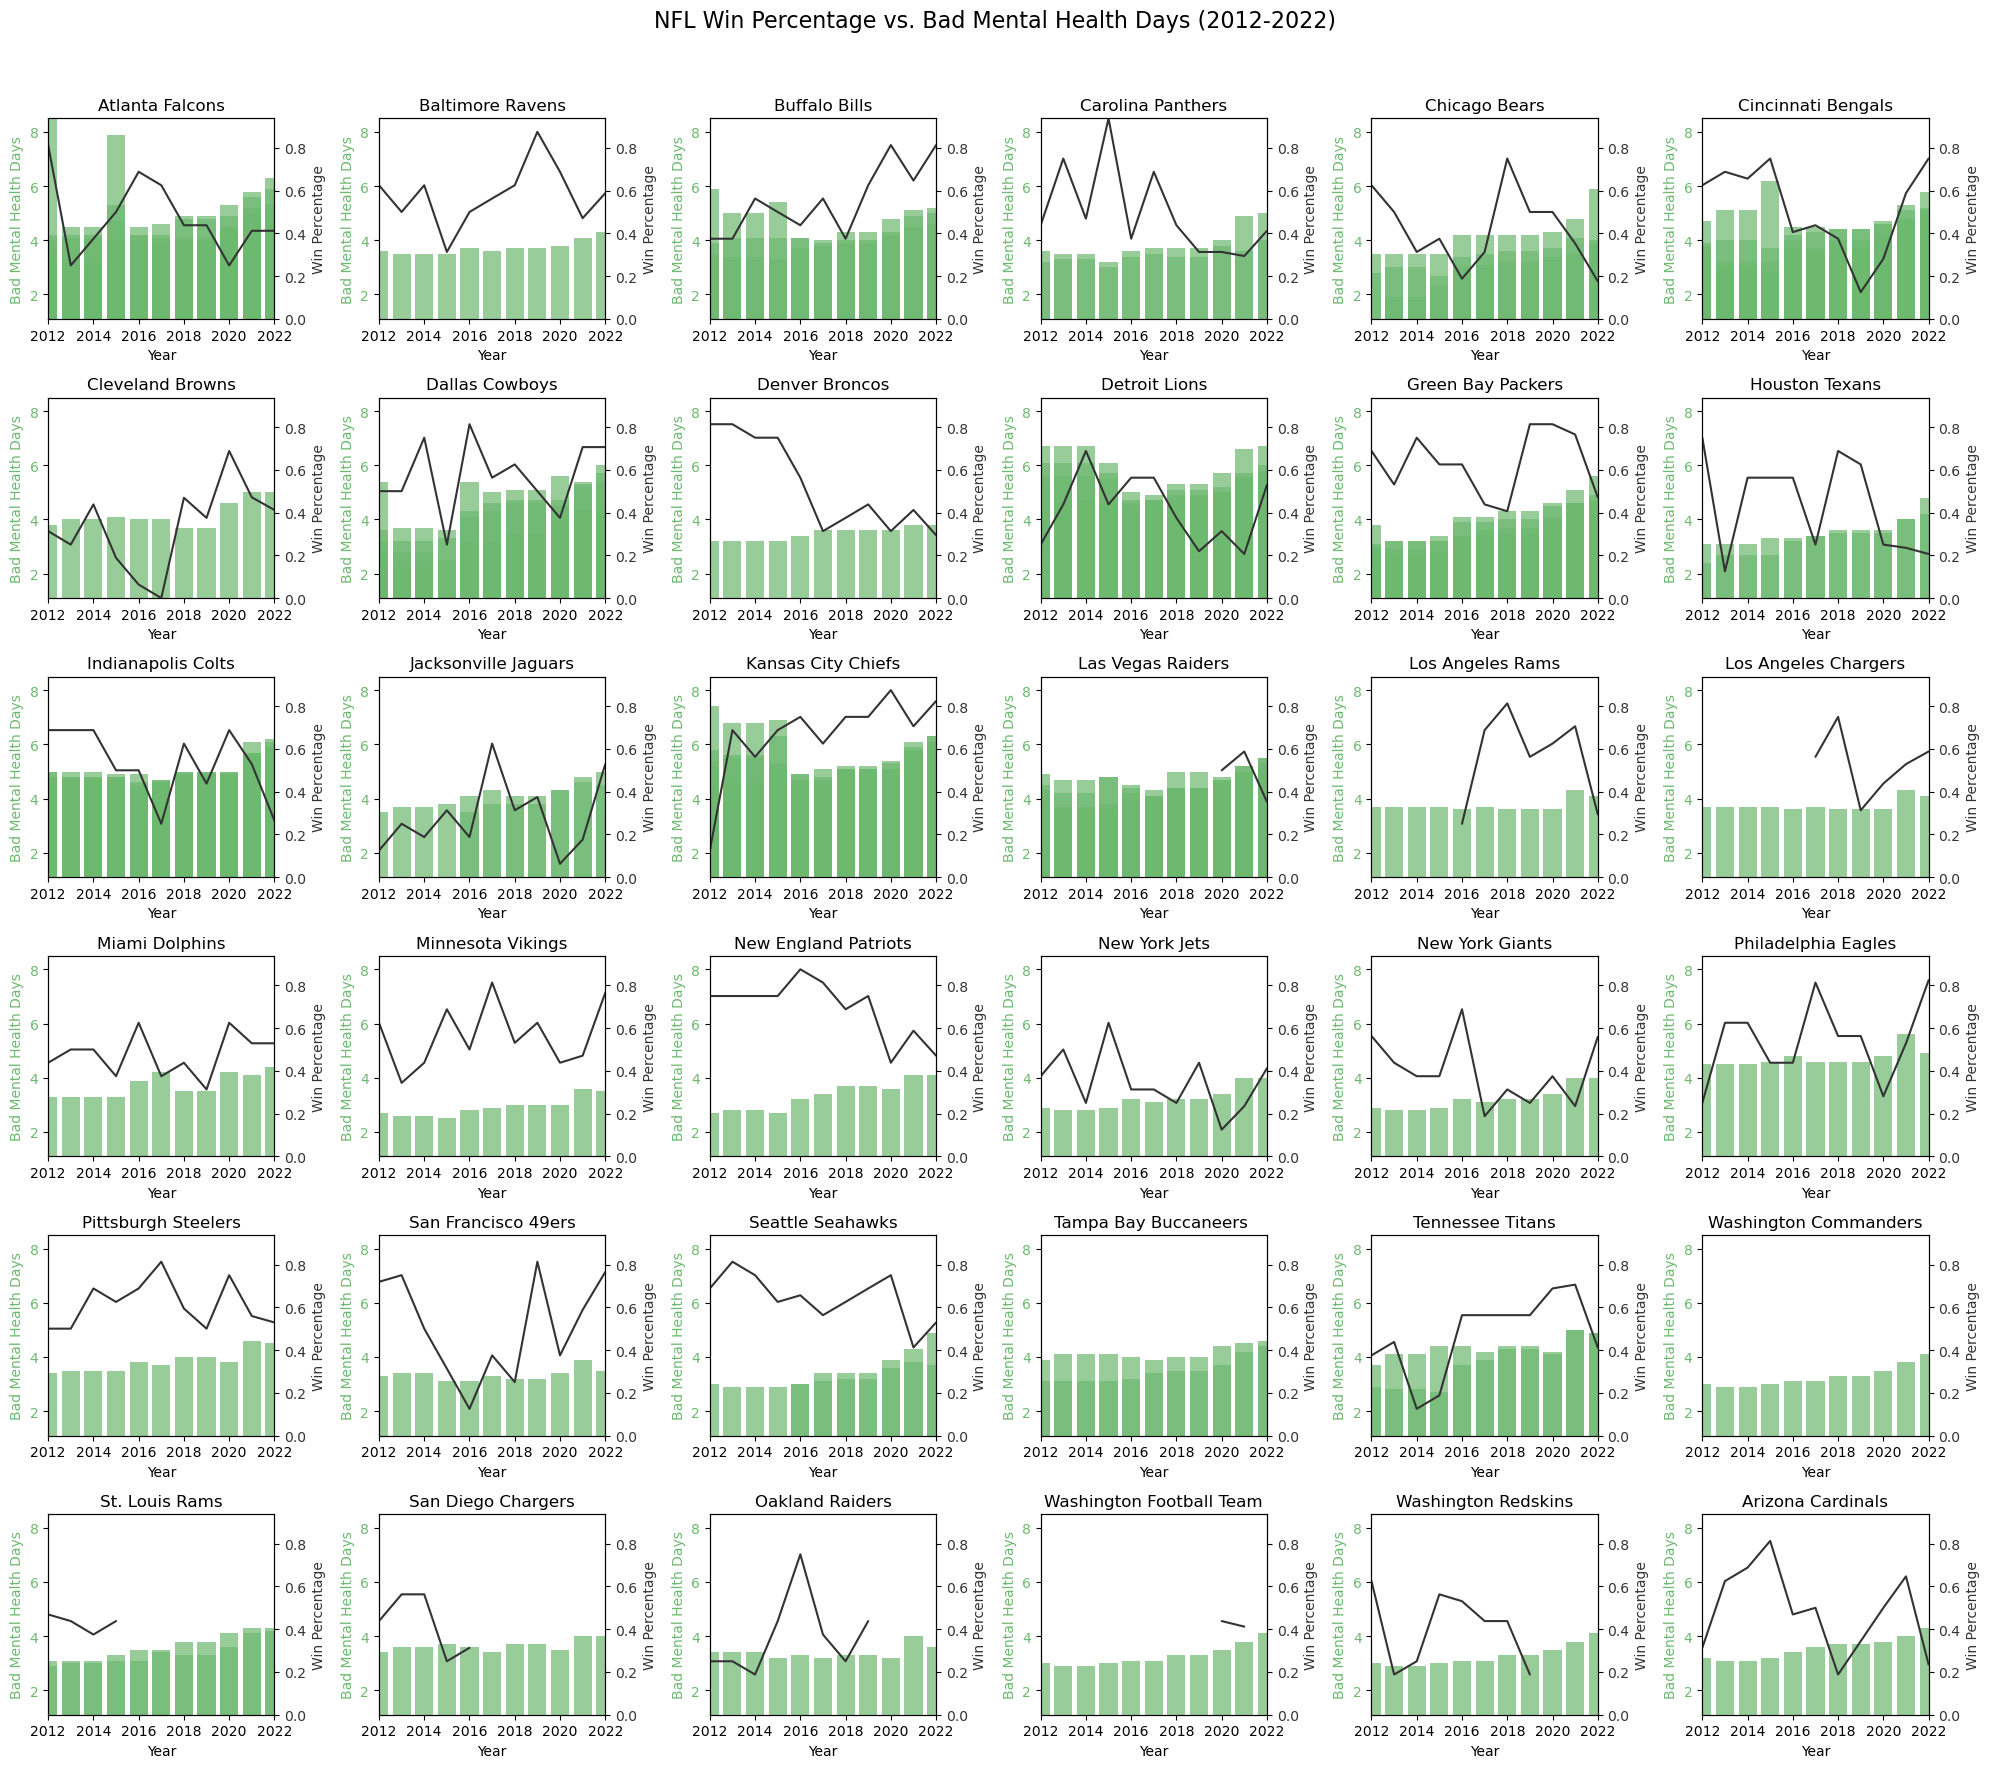

In [88]:
# Determine uniform axis ranges
x_min, x_max = merged1['year'].min(), merged1['year'].max()  # Global range for years
y1_min, y1_max = merged2['Average Number of Mentally Unhealthy Days'].min(), merged2['Average Number of Mentally Unhealthy Days'].max()  # For bar chart
y2_min, y2_max = merged1['win_loss_perc'].min(), merged1['win_loss_perc'].max()  # For line chart

# Create subplots grid (6 rows, 6 columns for 32 teams)
fig, axes = plt.subplots(6, 6, figsize=(20, 18))
fig.suptitle('NFL Win Percentage vs. Bad Mental Health Days (2012-2022)', fontsize=16)

# Flatten axes for easier iteration
axes = axes.flatten()

for i, team in enumerate(nfl_teams['Football Team']):
    df1 = merged1[merged1['team'] == team]
    df2 =  merged2[merged2['team'] == team]
    ax1 = axes[i-1]
    
    # Bar chart for bad mental health days
    ax1.bar(df2['year'], df2['Average Number of Mentally Unhealthy Days'], color='#6DB970', alpha=0.7)
    ax1.set_title(team)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Bad Mental Health Days', color='#6DB970')
    ax1.tick_params(axis='y', labelcolor='#6DB970')

    ax1.set_xlim(x_min, x_max)
    ax1.set_ylim(y1_min, y1_max)

    # Line chart for win percentage
    ax2 = ax1.twinx()
    ax2.plot(df1['year'], df1['win_loss_perc'], color='#333333', linestyle='-', label='Win %', solid_capstyle='round', solid_joinstyle='round')
    ax2.set_ylabel('Win Percentage', color='#333333')
    ax2.tick_params(axis='y', labelcolor='#333333')

    ax2.set_ylim(y2_min, y2_max)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('nfl_win_percentage.png')
plt.show()

In [89]:
# Create a table to store correlations of each team's win-loss percentage to the county's mental health
correlations = []
for team in nfl_teams['Football Team']:
    final = final_merged1[final_merged1['team'] == team]
    correlation = final['win_loss_perc'].corr(final['Average Number of Mentally Unhealthy Days'])
    correlations.append(correlation)

corr_df = pd.DataFrame(correlations)
print(corr_df)

print("\nTable average is: ", corr_df.mean())

           0
0  -0.488693
1  -0.038092
2   0.081663
3   0.297549
4  -0.471872
5  -0.246887
6   0.087892
7   0.386740
8   0.155163
9  -0.932200
10 -0.106817
11 -0.021589
12 -0.410911
13 -0.277486
14  0.172663
15  0.224360
16 -0.208179
17 -0.057804
18  0.139281
19  0.429826
20  0.177202
21 -0.605381
22 -0.322766
23 -0.051521
24  0.021720
25 -0.217283
26  0.416567
27 -0.547787
28       NaN
29  0.510956
30       NaN
31 -0.050335
32 -0.320871
33 -0.465050
34 -1.000000
35 -0.003525

Table average is:  0   -0.110102
dtype: float64


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


### BONUS DATA: Looking at the County's Drinking Habits and the Team's Performance

In [10]:
# Use 'left_on' and 'right_on' to specify columns
merged3 = pd.merge(nfl_teams, excessive_drinking_series, left_on='County', right_on='County', how='inner')

print(merged3)

      FIPS       State    County      Football Team  Unnamed: 4  Unnamed: 5  \
0     4013     Arizona  Maricopa  Arizona Cardinals         NaN         NaN   
1     4013     Arizona  Maricopa  Arizona Cardinals         NaN         NaN   
2     4013     Arizona  Maricopa  Arizona Cardinals         NaN         NaN   
3     4013     Arizona  Maricopa  Arizona Cardinals         NaN         NaN   
4     4013     Arizona  Maricopa  Arizona Cardinals         NaN         NaN   
...    ...         ...       ...                ...         ...         ...   
1535  6001  California   Alameda    Oakland Raiders         NaN         NaN   
1536  6001  California   Alameda    Oakland Raiders         NaN         NaN   
1537  6001  California   Alameda    Oakland Raiders         NaN         NaN   
1538  6001  California   Alameda    Oakland Raiders         NaN         NaN   
1539  6001  California   Alameda    Oakland Raiders         NaN         NaN   

      % Excessive Drinking  year  
0               

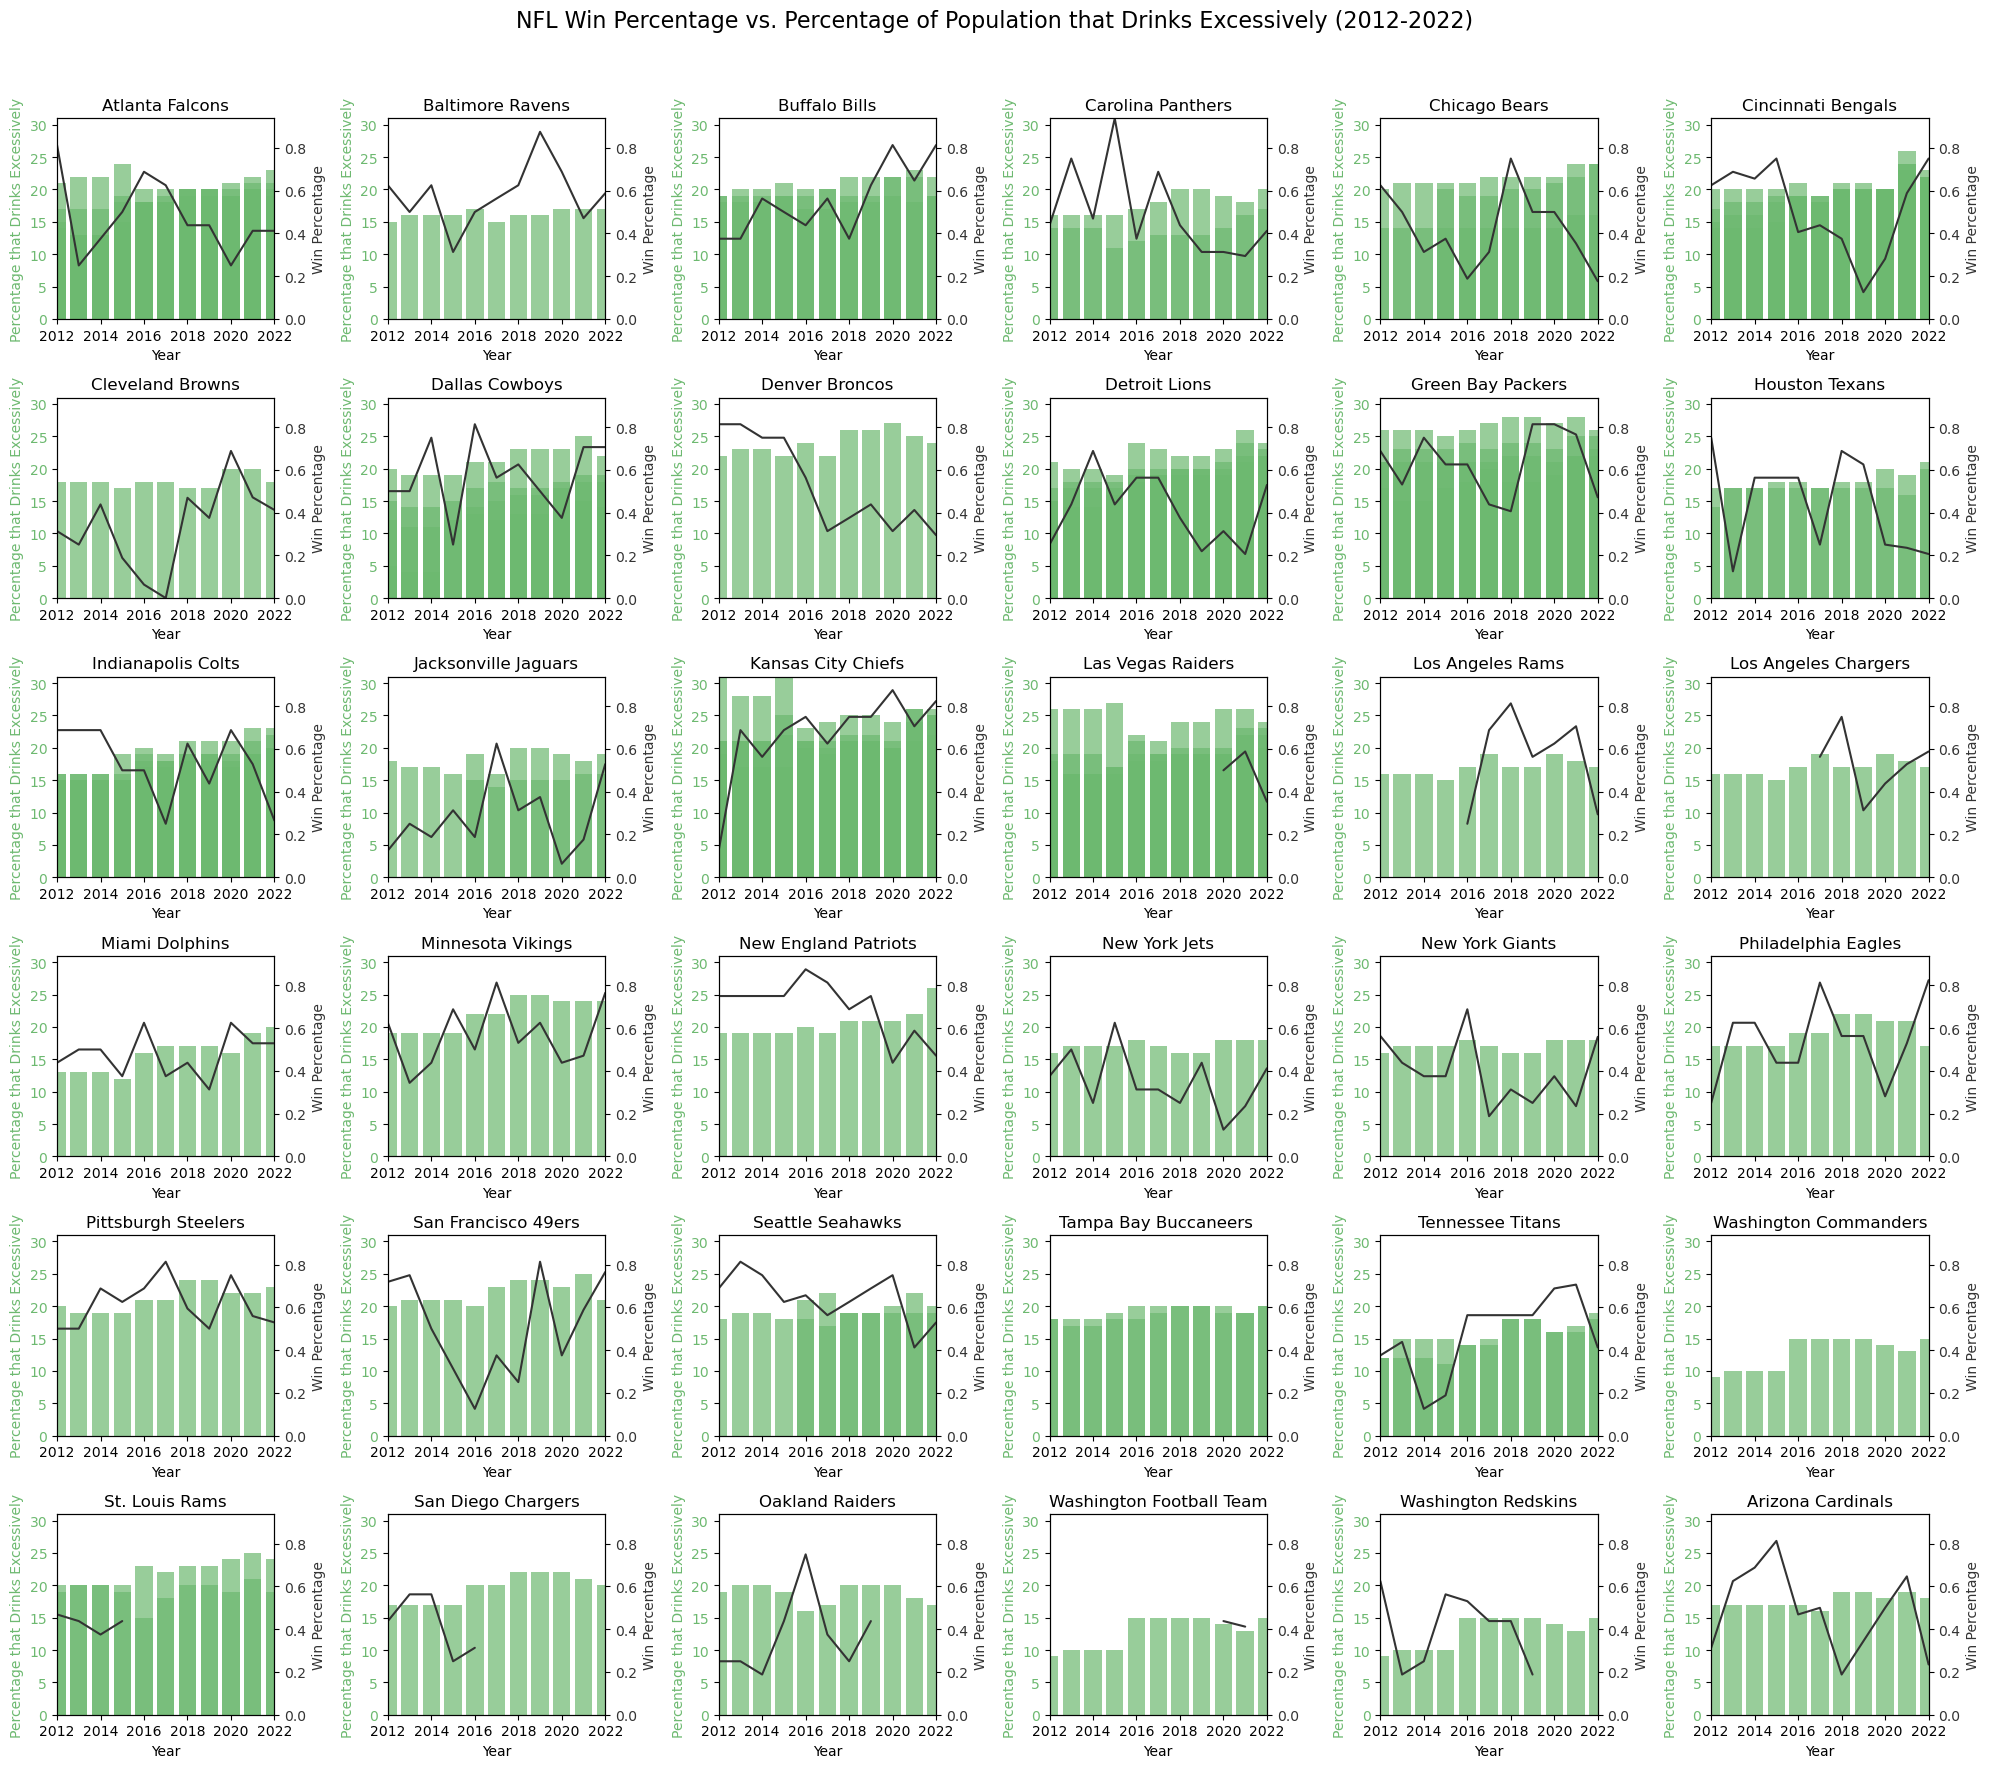

In [74]:
# Determine uniform axis ranges
x_min, x_max = merged1['year'].min(), merged1['year'].max()  # Global range for years
y1_min, y1_max = merged3['% Excessive Drinking'].min(), merged3['% Excessive Drinking'].max()  # For bar chart
y2_min, y2_max = merged1['win_loss_perc'].min(), merged1['win_loss_perc'].max()  # For line chart

# Create subplots grid (6 rows, 6 columns for 32 teams)
fig, axes = plt.subplots(6, 6, figsize=(20, 18))
fig.suptitle('NFL Win Percentage vs. Percentage of Population that Drinks Excessively (2012-2022)', fontsize=16)

# Flatten axes for easier iteration
axes = axes.flatten()

for i, team in enumerate(nfl_teams['Football Team']):
    df1 = merged1[merged1['team'] == team]
    df2 =  merged3[merged3['Football Team'] == team]
    ax1 = axes[i-1]
    
    # Bar chart for bad mental health days
    ax1.bar(df2['year'], df2['% Excessive Drinking'], color='#6DB970', alpha=0.7)
    ax1.set_title(team)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Percentage that Drinks Excessively', color='#6DB970')
    ax1.tick_params(axis='y', labelcolor='#6DB970')

    ax1.set_xlim(x_min, x_max)
    ax1.set_ylim(y1_min, y1_max)

    # Line chart for win percentage
    ax2 = ax1.twinx()
    ax2.plot(df1['year'], df1['win_loss_perc'], color='#333333', linestyle='-', label='Win %', solid_capstyle='round', solid_joinstyle='round')
    ax2.set_ylabel('Win Percentage', color='#333333')
    ax2.tick_params(axis='y', labelcolor='#333333')

    ax2.set_ylim(y2_min, y2_max)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('nfl_drink_percentage.png')
plt.show()

In [77]:
# Rename columns if necessary for consistency
merged3.rename(columns={'Football Team': 'team'}, inplace=True)

# Merge the two tables
final_merged2 = pd.merge(
    merged1, merged3, 
    on=['team', 'year'],  # Columns to merge on
    how='left'           # Merge type: 'inner', 'outer', 'left', or 'right'
)

# Display the resulting DataFrame

final_merged2 = final_merged2.drop(['Unnamed: 4_x', 'Unnamed: 5_x', 'FIPS_y', 'State_y', 'County_y', 'Unnamed: 4_y', 'Unnamed: 5_y'], axis=1)

print(final_merged2)

      FIPS_x   State_x         County_x        Football Team  \
0       4013   Arizona         Maricopa    Arizona Cardinals   
1       4013   Arizona         Maricopa    Arizona Cardinals   
2       4013   Arizona         Maricopa    Arizona Cardinals   
3       4013   Arizona         Maricopa    Arizona Cardinals   
4       4013   Arizona         Maricopa    Arizona Cardinals   
...      ...       ...              ...                  ...   
1363   24033  Maryland  Prince George's  Washington Redskins   
1364   24033  Maryland  Prince George's  Washington Redskins   
1365   24033  Maryland  Prince George's  Washington Redskins   
1366   24033  Maryland  Prince George's  Washington Redskins   
1367   24033  Maryland  Prince George's  Washington Redskins   

                     team  win_loss_perc  year  % Excessive Drinking  
0       Arizona Cardinals          0.313  2012                  17.0  
1       Arizona Cardinals          0.625  2013                  17.0  
2       Arizona Ca

In [85]:
# Create a table to store correlations of each team's win-loss percentage to the county's excessive drinking habits by population percentage
correlations = []
for team in nfl_teams['Football Team']:
    final = final_merged2[final_merged2['team'] == team]
    correlation = final['win_loss_perc'].corr(final['% Excessive Drinking'])
    correlations.append(correlation)

corr_df = pd.DataFrame(correlations)

print(corr_df)

print("\nTable average is: ", corr_df.mean())

           0
0  -0.388655
1  -0.083076
2  -0.093676
3   0.358643
4  -0.319094
5  -0.122552
6  -0.191839
7   0.459094
8   0.024375
9  -0.613159
10 -0.137608
11 -0.016883
12 -0.389486
13 -0.340496
14  0.073893
15  0.231139
16  0.017018
17  0.426055
18 -0.165549
19  0.167502
20  0.139637
21 -0.719623
22 -0.280119
23  0.259834
24 -0.132461
25 -0.152810
26  0.028330
27 -0.288543
28       NaN
29  0.476302
30       NaN
31 -0.396911
32 -0.440395
33 -0.764846
34  1.000000
35 -0.087632

Table average is:  0   -0.072459
dtype: float64


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


## Findings
Graphically, there is a lot to look at - which is expected. With 32 teams in the NFL currently and more iterations they've gone through, there is a lot to visualize. It is hard to observe any trends considering this, but seeing how different counties and teams compare is interesting, which is ultimately the goal of this project. To find anything statistically notable, we employed the use of the built-in correlation functions of Pandas and finding the degree of a relationship between the two values. 

The correlation function additionally proved that there isn't a strong relationship between the two variables, but in general we can see there is an inverse relationship - the higher the win percentage, the lower the number of reported bad mental health days. 

## Discussion

### Concluding Summary

This project investigated the relationship between **NFL team performance** (measured by win percentages) and **community health metrics**, specifically **average mentally unhealthy days** and **excessive drinking rates** across regions from 2012 to 2022. By merging sports performance data with public health datasets, the goal was to identify potential correlations that could reveal how sports success might influence community well-being.

While the study utilized statistically sound methods, including correlation analysis, time series visualization, and significance testing, the results indicate that **substantial connections between NFL team performance and public health metrics were difficult to establish**. Some statistical correlations were identified; however, they were inconsistent across teams and regions, and no definitive causal relationships were observed.

### Implications

1. **Statistical Observations**:
   - Correlation analysis revealed some weak to moderate associations between win percentages and health metrics in certain teams, but these were not uniform or significant enough to generalize across all teams or regions.

2. **Temporal Trends**:
   - Time series visualizations provided valuable context, showing year-to-year fluctuations in health metrics and team performance. However, no clear patterns emerged to suggest a consistent influence of team success on community health outcomes.

3. **Regional Differences**:
   - Variations in the strength of relationships across cities hinted at potential local factors, such as economic conditions or community engagement, but these were beyond the scope of the data analyzed.

### Challenges and Limitations

- **Difficulty in Establishing Causation**:
  - While the analysis was statistically robust, the complexity of factors influencing community health made it difficult to isolate the impact of NFL team performance alone.
  - External influences, such as economic conditions, local policies, or cultural differences, were not accounted for and likely played a significant role in shaping the observed health metrics.

- **Data Constraints**:
  - Health data aggregated at the county level may not align perfectly with NFL team fanbases, leading to potential mismatches in the analysis.
  - The relatively small number of observations (team-level data over a limited time frame) restricted the ability to draw broader conclusions.

### Final Reflections

This project highlights the challenges of drawing concrete connections between sports success and public health. While the statistical methods employed ensured rigor, the findings underscore the complexity of these relationships and the limitations of the data in proving causation. The results do not support a strong or consistent link between NFL performance and community health metrics, but they open the door for future research with expanded datasets and additional contextual variables.

Despite the lack of definitive conclusions, this study contributes to the broader understanding of how societal phenomena, like professional sports, intersect with public health. With further refinement, such as including qualitative data or additional factors like economic indicators, future studies may provide deeper insights into these multifaceted relationships.